In [22]:
import pandas as pd
import numpy as np

In [23]:
cols=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df=pd.read_csv('iris.data', names=cols)

In [24]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [26]:
#encoding the target variable column using label encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
le.fit(df['class'])

LabelEncoder()

In [30]:
df['class_encoded']=le.transform(df['class'])

In [31]:
df.head()

,sepal length,sepal width,petal length,petal width,class,class_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [32]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
df['class_encoded'].unique()

array([0, 1, 2])

In [34]:
#setosa=1 versicolor=2 virginica=3

In [37]:
#Splitting and training the data

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [39]:
X=df.drop(['class', 'class_encoded'], axis=1)
y=df['class_encoded']

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [110]:
rf=RandomForestClassifier(criterion='entropy', max_depth=6, n_jobs=2, random_state=0)

In [111]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_jobs=2,
                       random_state=0)

In [112]:
y_pred=rf.predict(X_test)

In [113]:
#importing accuracy score

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
score=accuracy_score(y_pred, y_test)

In [116]:
score

0.9333333333333333

In [117]:
#confusion matrix

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [119]:
cm=confusion_matrix(y_pred, y_test)

<Axes: >

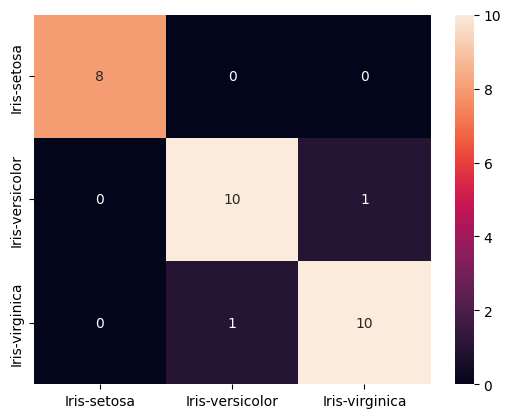

In [130]:
#setosa=1 versicolor=2 virginica=3
cols=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.heatmap(cm, annot=True, xticklabels=cols, yticklabels=cols)